In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define data transformations for data augmentation and normalization
data_transforms = {
    'Training': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'Testing': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Define the data directory
data_dir = 'dataset'

# Create data loaders
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['Training', 'Testing']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=64, shuffle=True, num_workers=4) for x in ['Training', 'Testing']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['Training', 'Testing']}
print(dataset_sizes)

class_names = image_datasets['Training'].classes
num_classes = len(class_names)

# Load the pre-trained ResNet-18 model
# Update this line to use the 'weights' parameter
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

# Modify the final layer to match the number of classes
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)

# Freeze all layers except the final classification layer
for name, param in model.named_parameters():
    if "fc" in name:  # Unfreeze the final classification layer
        param.requires_grad = True
    else:
        param.requires_grad = False

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # Use all parameters

# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

num_epochs = 5 # Reduce the number of epochs for testing
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    print('-' * 10)
    for phase in ['Training', 'Testing']:
        if phase == 'Training':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for i, (inputs, labels) in enumerate(dataloaders[phase]):
            if i % 10 == 0:
                print(f'Batch {i}/{len(dataloaders[phase])}')
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'Training'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'Training':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

print("Training complete!")

model_dir = 'models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'brain_classification_model.pth')
torch.save(model.state_dict(), model_path)
print(f'Model saved to {model_path}')
print(f'Current working directory: {os.getcwd()}')

{'Training': 5712, 'Testing': 1311}
Epoch 1/5
----------
Batch 0/90
Batch 10/90
Batch 20/90
Batch 30/90
Batch 40/90
Batch 50/90
Batch 60/90
Batch 70/90
Batch 80/90
Training Loss: 0.9812 Acc: 0.6103
Batch 0/21
Batch 10/21
Batch 20/21
Testing Loss: 0.6942 Acc: 0.7513
Epoch 2/5
----------
Batch 0/90
Batch 10/90
Batch 20/90
Batch 30/90
Batch 40/90
Batch 50/90
Batch 60/90
Batch 70/90
Batch 80/90
Training Loss: 0.6441 Acc: 0.7743
Batch 0/21
Batch 10/21
Batch 20/21
Testing Loss: 0.5907 Acc: 0.7712
Epoch 3/5
----------
Batch 0/90
Batch 10/90
Batch 20/90
Batch 30/90
Batch 40/90
Batch 50/90
Batch 60/90
Batch 70/90
Batch 80/90
Training Loss: 0.5635 Acc: 0.8030
Batch 0/21
Batch 10/21
Batch 20/21
Testing Loss: 0.5473 Acc: 0.7925
Epoch 4/5
----------
Batch 0/90
Batch 10/90
Batch 20/90
Batch 30/90
Batch 40/90
Batch 50/90
Batch 60/90
Batch 70/90
Batch 80/90
Training Loss: 0.5290 Acc: 0.8139
Batch 0/21
Batch 10/21
Batch 20/21
Testing Loss: 0.5215 Acc: 0.7986
Epoch 5/5
----------
Batch 0/90
Batch 10/90


Current working directory: C:\Users\Dell\Downloads


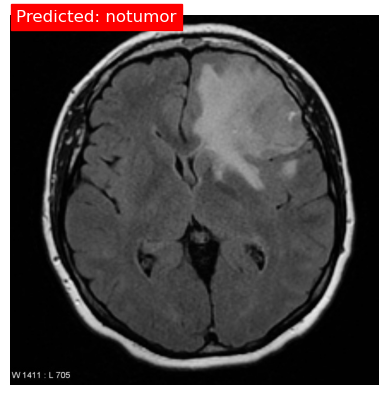

In [13]:
import torch
from torch import nn
from torchvision import models, transforms
from torchvision.models import ResNet18_Weights
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# Print current working directory
print("Current working directory:", os.getcwd())

# Ensure the correct path to the model file
model_path = 'C:\\Users\\Dell\\Downloads\\models\\brain_classification_model.pth'  # Update this to the correct path if necessary

# Check if the file exists
if not os.path.isfile(model_path):
    raise FileNotFoundError(f"No such file: '{model_path}'")

# Load the saved model with 4 output units
model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
model.fc = nn.Linear(model.fc.in_features, 4)  # Adjust to match the saved model's output units
model.load_state_dict(torch.load(model_path))
model.eval()

# Prepare your new image for classification
image_path =  'C:\\Users\\Dell\\Downloads\\gliomaa.jpeg'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

# Perform inference with the model
with torch.no_grad():
    output = model(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']  # Make sure these class names match your training data
predicted_class_name = class_names[predicted_class.item()]

# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='red')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define data transformations for data augmentation and normalization
data_transforms = {
    'Training': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'Testing': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Define the data directory
data_dir = 'dataset'

# Create data loaders
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['Training', 'Testing']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers= 80) for x in ['Training', 'Testing']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['Training', 'Testing']}
print(dataset_sizes)

class_names = image_datasets['Training'].classes
num_classes = len(class_names)

# Load the pre-trained ResNet-50 model
# Update this line to use the 'weights' parameter
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)

# Modify the final layer to match the number of classes
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)

# Freeze all layers except the final classification layer
for name, param in model.named_parameters():
    if "fc" in name:  # Unfreeze the final classification layer
        param.requires_grad = True
    else:
        param.requires_grad = False

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # Use all parameters

# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

num_epochs = 25 # Reduce the number of epochs for testing
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    print('-' * 10)
    for phase in ['Training', 'Testing']:
        if phase == 'Training':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for i, (inputs, labels) in enumerate(dataloaders[phase]):
            if i % 10 == 0:
                print(f'Batch {i}/{len(dataloaders[phase])}')
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'Training'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'Training':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

print("Training complete!")

model_dir = 'models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'brain_classification_model.pth')
torch.save(model.state_dict(), model_path)
print(f'Model saved to {model_path}')
print(f'Current working directory: {os.getcwd()}')

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\torch\utils\data\dataloader.py:558: UserWarning: This DataLoader will create 80 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


{'Training': 5712, 'Testing': 1311}
Epoch 1/25
----------
Batch 0/1428
Batch 10/1428
Batch 20/1428
Batch 30/1428
Batch 40/1428
Batch 50/1428
Batch 60/1428
Batch 70/1428
Batch 80/1428
Batch 90/1428
Batch 100/1428
Batch 110/1428
Batch 120/1428
Batch 130/1428
Batch 140/1428
Batch 150/1428
Batch 160/1428
Batch 170/1428
Batch 180/1428
Batch 190/1428
Batch 200/1428
Batch 210/1428
Batch 220/1428
Batch 230/1428
Batch 240/1428
Batch 250/1428
Batch 260/1428
Batch 270/1428
Batch 280/1428
Batch 290/1428
Batch 300/1428
Batch 310/1428
Batch 320/1428
Batch 330/1428
Batch 340/1428
Batch 350/1428
Batch 360/1428
Batch 370/1428
Batch 380/1428
Batch 390/1428
Batch 400/1428
Batch 410/1428
Batch 420/1428
Batch 430/1428
Batch 440/1428
Batch 450/1428
Batch 460/1428
Batch 470/1428
Batch 480/1428
Batch 490/1428
Batch 500/1428
Batch 510/1428
Batch 520/1428
Batch 530/1428
Batch 540/1428
Batch 550/1428
Batch 560/1428
Batch 570/1428
Batch 580/1428
Batch 590/1428
Batch 600/1428
Batch 610/1428
Batch 620/1428
Batch 63

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define data transformations for data augmentation and normalization
data_transforms = {
    'Training': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'Testing': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Define the data directory
data_dir = 'dataset'

# Create data loaders
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['Training', 'Testing']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=32, shuffle=True, num_workers=4) for x in ['Training', 'Testing']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['Training', 'Testing']}
print(dataset_sizes)

class_names = image_datasets['Training'].classes
num_classes = len(class_names)

# Load the pre-trained ResNet-18 model
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

# Modify the final layer to match the number of classes
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)

# Freeze all layers except the final classification layer
for name, param in model.named_parameters():
    if "fc" in name:  # Unfreeze the final classification layer
        param.requires_grad = True
    else:
        param.requires_grad = False

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Use learning rate scheduling
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

num_epochs = 30  # Increase the number of epochs

best_model_wts = model.state_dict()
best_acc = 0.0

for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    print('-' * 10)
    for phase in ['Training', 'Testing']:
        if phase == 'Training':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for i, (inputs, labels) in enumerate(dataloaders[phase]):
            if i % 10 == 0:
                print(f'Batch {i}/{len(dataloaders[phase])}')
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'Training'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'Training':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        if phase == 'Training':
            scheduler.step()

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # Deep copy the model
        if phase == 'Testing' and epoch_acc > best_acc:
            best_acc = epoch_acc
            best_model_wts = model.state_dict()

print("Training complete!")
print(f'Best Testing Accuracy: {best_acc:.4f}')

# Load best model weights
model.load_state_dict(best_model_wts)

model_dir = 'models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'brain_classification_model.pth')
torch.save(model.state_dict(), model_path)
print(f'Model saved to {model_path}')
print(f'Current working directory: {os.getcwd()}')

{'Training': 5712, 'Testing': 1311}
Epoch 1/30
----------
Batch 0/179
Batch 10/179
Batch 20/179
Batch 30/179
Batch 40/179
Batch 50/179
Batch 60/179
Batch 70/179
Batch 80/179
Batch 90/179
Batch 100/179
Batch 110/179
Batch 120/179
Batch 130/179
Batch 140/179
Batch 150/179
Batch 160/179
Batch 170/179
Training Loss: 0.8284 Acc: 0.6882
Batch 0/41
Batch 10/41
Batch 20/41
Batch 30/41
Batch 40/41
Testing Loss: 0.5963 Acc: 0.7773
Epoch 2/30
----------
Batch 0/179
Batch 10/179
Batch 20/179
Batch 30/179
Batch 40/179
Batch 50/179
Batch 60/179
Batch 70/179
Batch 80/179
Batch 90/179
Batch 100/179
Batch 110/179
Batch 120/179
Batch 130/179
Batch 140/179
Batch 150/179
Batch 160/179
Batch 170/179
Training Loss: 0.5603 Acc: 0.7936
Batch 0/41
Batch 10/41
Batch 20/41
Batch 30/41
Batch 40/41
Testing Loss: 0.5240 Acc: 0.8009
Epoch 3/30
----------
Batch 0/179
Batch 10/179
Batch 20/179
Batch 30/179
Batch 40/179
Batch 50/179
Batch 60/179
Batch 70/179
Batch 80/179
Batch 90/179
Batch 100/179
Batch 110/179
Batch 1

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import os

# Define data transformations for data augmentation and normalization
data_transforms = {
    'Training': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'Testing': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Define the data directory
data_dir = 'dataset'

# Create data loaders
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['Training', 'Testing']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['Training', 'Testing']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['Training', 'Testing']}
print(dataset_sizes)

class_names = image_datasets['Training'].classes
num_classes = len(class_names)

# Define a custom CNN model with Leaky ReLU activation
class ModifiedCNN(nn.Module):
    def _init_(self, num_classes):
        super(ModifiedCNN, self)._init_()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2, padding=0)
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc1 = nn.Linear(128, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.leaky_relu = nn.LeakyReLU(0.1)  # Leaky ReLU with negative slope 0.1

    def forward(self, x):
        x = self.pool1(self.leaky_relu(self.conv1(x)))
        x = self.pool2(self.leaky_relu(self.conv2(x)))
        x = self.pool1(self.leaky_relu(self.conv3(x)))
        x = self.global_avg_pool(x)
        x = x.view(-1, 128)
        x = self.leaky_relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model, loss function, and optimizer
model = ModifiedCNN(num_classes=num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

num_epochs = 2 # Reduce the number of epochs for testing
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    print('-' * 10)
    for phase in ['Training', 'Testing']:
        if phase == 'Training':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for i, (inputs, labels) in enumerate(dataloaders[phase]):
            if i % 10 == 0:
                print(f'Batch {i}/{len(dataloaders[phase])}')
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'Training'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'Training':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

print("Training complete!")

model_dir = 'models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'brain_classification_model.pth')
torch.save(model.state_dict(), model_path)
print(f'Model saved to {model_path}')
print(f'Current working directory: {os.getcwd()}')

{'Training': 5712, 'Testing': 1311}


TypeError: ModifiedCNN.__init__() got an unexpected keyword argument 'num_classes'

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import os

# Define data transformations for data augmentation and normalization
data_transforms = {
    'Training': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'Testing': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Define the data directory
data_dir = 'dataset'

# Create data loaders
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['Training', 'Testing']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=40, shuffle=True, num_workers=4) for x in ['Training', 'Testing']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['Training', 'Testing']}
print(dataset_sizes)

class_names = image_datasets['Training'].classes
num_classes = len(class_names)

# Define a custom CNN model with Leaky ReLU activation
class ModifiedCNN(nn.Module):
    def __init__(self, num_classes):
        super(ModifiedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2, padding=0)
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc1 = nn.Linear(128, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.leaky_relu = nn.LeakyReLU(0.1)  # Leaky ReLU with negative slope 0.1

    def forward(self, x):
        x = self.pool1(self.leaky_relu(self.conv1(x)))
        x = self.pool2(self.leaky_relu(self.conv2(x)))
        x = self.pool1(self.leaky_relu(self.conv3(x)))
        x = self.global_avg_pool(x)
        x = x.view(-1, 128)
        x = self.leaky_relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model, loss function, and optimizer
model = ModifiedCNN(num_classes=num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Print the model summary
print(model)

# Rest of your training loop and model saving code remains unchanged
num_epochs = 20 # Reduce the number of epochs for testing
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    print('-' * 10)
    for phase in ['Training', 'Testing']:
        if phase == 'Training':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for i, (inputs, labels) in enumerate(dataloaders[phase]):
            if i % 10 == 0:
                print(f'Batch {i}/{len(dataloaders[phase])}')
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'Training'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'Training':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

print("Training complete!")

model_dir = 'models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'brain_classification_model.pth')
torch.save(model.state_dict(), model_path)
print(f'Model saved to {model_path}')
print(f'Current working directory: {os.getcwd()}')

{'Training': 5712, 'Testing': 1311}
ModifiedCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (global_avg_pool): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc1): Linear(in_features=128, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=4, bias=True)
  (leaky_relu): LeakyReLU(negative_slope=0.1)
)
Epoch 1/20
----------
Batch 0/143
Batch 10/143
Batch 20/143
Batch 30/143
Batch 40/143
Batch 50/143
Batch 60/143
Batch 70/143
Batch 80/143
Batch 90/143
Batch 100/143
Batch 110/143
Batch 120/143
Batch 130/143
Batch 140/143
Training Loss: 1.1159 Acc: 0.5030
Batch 0/33
Batch 10/33
Batch 20/33
Batch 30/33
Testing Loss: 1.0522 Acc: 0.5896
Epoch 2/20
--

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torchvision.datasets import ImageFolder
import os
import copy
from torchvision.models import ResNet18_Weights

# Define data transformations
data_transforms = {
    'Training': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'Testing': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Define custom ImageFolder class to ignore .ipynb_checkpoints
class CustomImageFolder(ImageFolder):
    def __init__(self, root, transform=None):
        super().__init__(root, transform)
        self.samples = [s for s in self.samples if ".ipynb_checkpoints" not in s[0]]

# Define the data directory
data_dir = 'braintumor'

# Create data loaders
image_datasets = {x: CustomImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['Training', 'Testing']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=64, shuffle=True, num_workers=4) for x in ['Training', 'Testing']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['Training', 'Testing']}
print(dataset_sizes)

class_names = image_datasets['Training'].classes
num_classes = len(class_names)

# Load pre-trained ResNet18 model
model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(num_ftrs, num_classes)
)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Move model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

num_epochs = 40
best_model_wts = copy.deepcopy(model.state_dict())
best_acc = 0.0
early_stopping_patience = 5
epochs_no_improve = 0

for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    print('-' * 10)
    for phase in ['Training', 'Testing']:
        if phase == 'Training':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for i, (inputs, labels) in enumerate(dataloaders[phase]):
            if i % 10 == 0:
                print(f'Batch {i}/{len(dataloaders[phase])}')
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'Training'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'Training':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        if phase == 'Training':
            scheduler.step()

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # Early stopping
        if phase == 'Testing':
            if epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                epochs_no_improve = 0
            else:
                epochs_no_improve += 1
                if epochs_no_improve == early_stopping_patience:
                    print('Early stopping')
                    model.load_state_dict(best_model_wts)
                    break

print("Training complete!")

model.load_state_dict(best_model_wts)

model_dir = 'models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'brain_classification_model.pth')
torch.save(model.state_dict(), model_path)
print(f'Model saved to {model_path}')
print(f'Current working directory: {os.getcwd()}')
